In [1]:
! pip install mglearn

    100% |████████████████████████████████| 542kB 18.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

import mglearn

This file contains practice examples of the following topics:

* k-NN	
	
* Linear Regression	
  - Linear regression
  - Ridge ($L_2$ regularization)
  - Lasso ($L_1$ regularization)
	
* Linear Classification	
  -	Logistic regression

	
* SVM
  - Linear SVM
  - Nonear SVM (SVM with kernel)
	
* Neural Networks	(MLP)
  - MLP classification
  - MLP regression


(Most of the contents and code are from "Introduction to Machine Learning with Python" by Andreas C. Müller & Sarah Guido)

# k-NN classifier

Given an in
1. put $X$, find the set of nearest $k$ neighbors from training samples.
1. Select the most frequent class in the neighbor set.

API: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


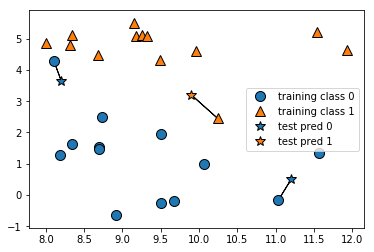

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=1                                     )

In [4]:
# prepare data

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
# create k-NN classifier instance

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [6]:
# train k-NN classifier

clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [7]:
# predict for X_test
predict = clf.predict(X_test)
print("Test set predictions: {}".format(predict))

Test set predictions: [1 0 1 0 1 0 0]


In [8]:
print("Prediction accuracy on test set: {}".format(np.mean(predict==y_test)))

# or
# print("Prediction accuracy on test set: {:%.2f}".format(clf.score(X_test, y_test)))

Prediction accuracy on test set: 0.8571428571428571


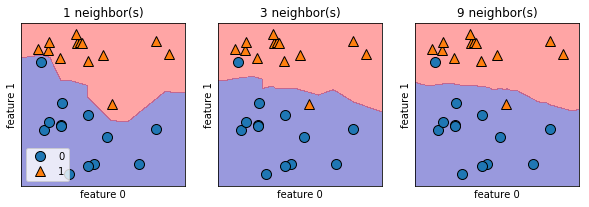

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))  # unit: inch.
for n_neighbors, ax in zip([1, 3, 9], axes):
  # the fit method returns the object self, so we can instantiate
  # and fit in one line
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend(loc=3)             # loc=3: lower left

Considering more and more neighbors
leads to a smoother decision boundary.

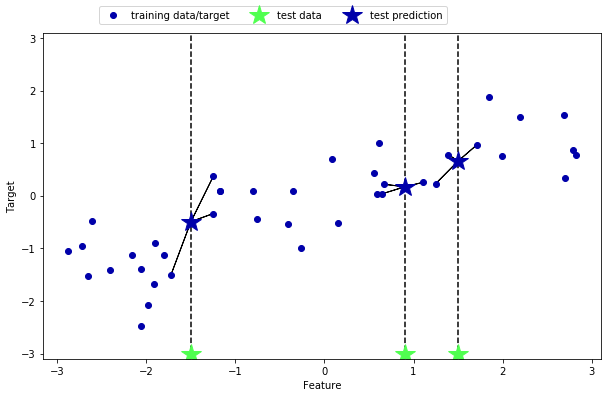

In [10]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

# Linear regression

>$\hat{y}=wx + b$

>$\hat{y}=w_1x_1+ w_2x_2+ ...+ b$

>$Loss_{linear} = \frac{1}{2N} \sum_i{(\hat{y}-y)^2}$
(least square)

See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## Linear regression on wave dataset

w[0]: 0.393906  b: -0.031804


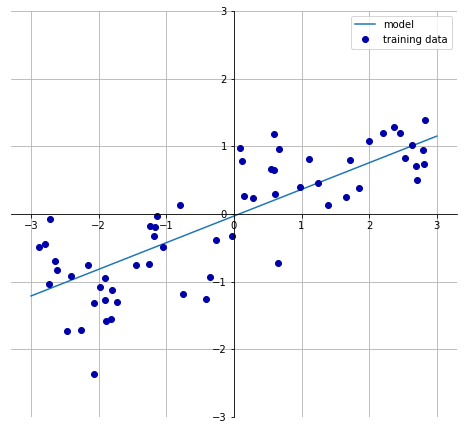

In [11]:
mglearn.plots.plot_linear_regression_wave()

In [0]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# regression
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))             # w
print("lr.intercept_: {}".format(lr.intercept_))   # b

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [14]:
# accuracy

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


## Linear regression on Boston house price data

In [15]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

(379, 104)

In [16]:
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))             # w
print("lr.intercept_: {}".format(lr.intercept_))   # b

lr.coef_: [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194e+00
  2.93666477e+0

In [17]:
# Performance
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Big difference between training accuracy and test accuracy: overfitting

## Ridge regression

> linear regression + L2 regularization

> $Loss_{ridge} = \frac{1}{2N} \sum_i{(\hat{y}-y)^2}+\alpha |W|^2$


See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [0]:
from sklearn.linear_model import Ridge

In [0]:
ridge = Ridge().fit(X_train, y_train)           # by default, alpha = 1

In [0]:
#print("ridge.coef_: {}".format(ridge.coef_))             # w
#print("ridge.intercept_: {}".format(ridge.intercept_))   # b

In [21]:
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Lower training accuracy, but higher test accuracy

In [22]:
# applying higher alpha  --> too strong constraint
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [23]:
# applying low alpha    --> appropriate constraint
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


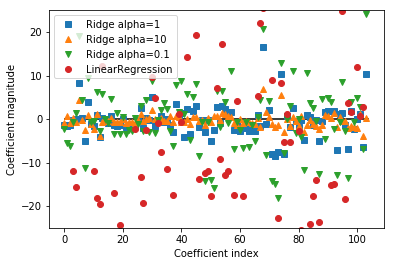

In [24]:
# coefficient magnitude
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

## Lasso regression

> linear regression + L1 regularization

> $Loss_{lasso}=\frac{1}{2N} \sum_i{(\hat{y}-y)^2} +\alpha |W|$


See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [0]:
from sklearn.linear_model import Lasso

In [26]:
# by default, alpha = 1
lasso = Lasso().fit(X_train, y_train)         # default alpha = 1, severe underfitting
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [27]:
# Lasso with alpha = 0.01
lasso001 = Lasso(0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [28]:
# Lasso with alpha = 0.0001
lasso0001 = Lasso(0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso0001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

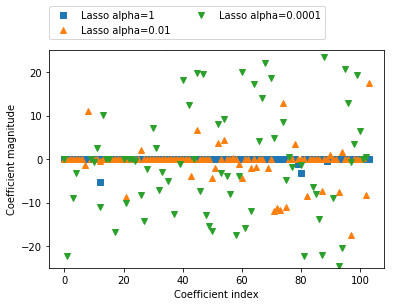

In [29]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha=0.0001")
#plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# Linear classification

* binary classification
> - class +1 if $ŷ = \sum_i{w_ix_i}+b = w_1 x_1 + w_2 x_2+...+b > 0$
> - class -1 if $ŷ = \sum_i{w_ix_i}+b = w_1 x_1 + w_2 x_2+...+b < 0$

> Note! Class boundary is hyperplane

* cf. multi-class classification: $ŷ = argmax_j {[\sum_i{w_{ji} x_i} + b_j]} = argmax_j {[w_{j1} x_1 + w_{j2} x_2+...+b_j]}$

* Popular fitting algorithms
> * Logistic regression (linear_model.LogisticRegression)
> * (linear) Support Vector Machine (SVM)



## Logistic regression
* binary classification ($y$ = 0 or 1)
* $\hat{y} = sigmoid(\sum_i{w_ix_i+b})$
* $ Loss_{logistic} = \frac{1}{2N}(y - \hat{y})^2 + \alpha |W|_L$


See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


## Support Vector Machine

(SVM will be covered below.)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


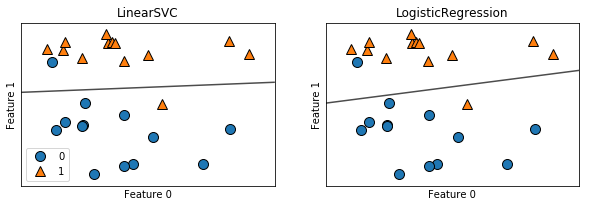

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
  ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{}".format(clf.__class__.__name__))
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")
axes[0].legend()

## hyper parameter C to control regularization 

**small C** means **stronger regularization**

In [32]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# C = 1
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test))) 

Training set score: 0.955
Test set score: 0.958


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
# C = 100
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
# C = 0.01
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


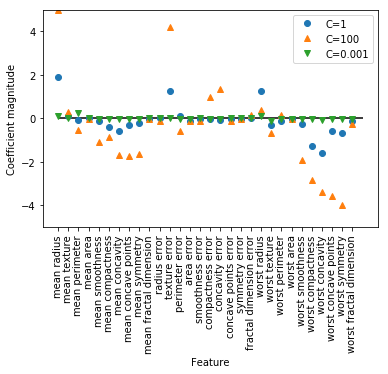

In [35]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

# Support Vector Machine


## Linear SVM
* $W_*=argmin_W{\frac{|W|}{2}}$  s.t.
> * $ WX_i+b \geq+1$ for $y_i = +1$
> * $ WX_i+b \leq+1$ for $y_i = -1$
> * equaivalent to $y_i(WX_i+b)-1\geq 0$


* Loss function: $L_p = \frac{1}{2}|W|^2 - \sum_{i=1}^l{\alpha_i y_i (WX_i+b)}+\sum_{i=1}^l\alpha_i$

> where $\alpha_i$'s are Lagrange multipliers

* Solution

> * $W=\sum_i{\alpha_iy_iX_i}$

> * $\sum_i{\alpha_iy_i}=0$

* Dual formulation: $L_D=\sum_i{\alpha_i}-\frac{1}{2}\sum_{i,j}{\alpha_i\alpha_j y_i y_j X_i \cdot X_j}$

> Find $\alpha_i$'s that maximize $L_D$.

> Note! $X_i$'s with $\alpha_i > 0$ are called **support vectors**'



* Discrimant function: $WX+b = \sum_i{\alpha_iy_iX_i}\cdot X +b$

See https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html


## C-SVM (Linear SVM with soft margin) for non-separable case

* $W_*=argmin_W{[\frac{|W|}{2}+C(\sum_i {\xi_i})]}$  s.t.
> * $ X_iW+b \geq+1-\xi_i$ for $y_i=+1$
> * $ X_iW+b \leq-1+\xi_i$ for $y_i=-1$
> * equaivalent to $y_i(X_iW+b)-1+\xi_i\geq 0$


* $L_p = \frac{1}{2}|W|^2 + C\sum_{i=1}^l\xi_i-\sum_{i=1}^l{\alpha_i \{y_i (X_iW+b)}-1+\xi_i\}-\sum_i{\mu_i \xi_i}$


See https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html


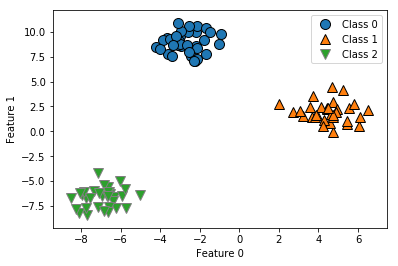

In [36]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [37]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


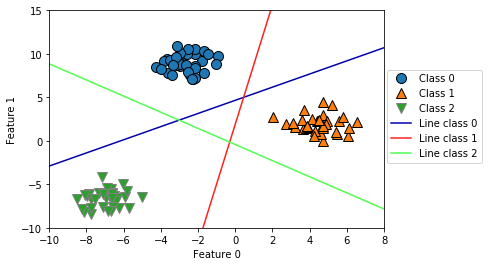

In [38]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
  mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

# Nonlinear Support Vector Machine (SVM with kernel)


* Linear SVM

> - Loss: $L_{linearSVM}=\sum_i{\alpha_i}-\frac{1}{2}\sum_{i,j}{\alpha_i\alpha_j y_i y_j X_i \cdot X_j}$
> - Discrimant function: $WX+b = \sum_i{\alpha_iy_iX_i}\cdot X +b$


* SVM with kernel

> Introduce a nonlinear transform $\phi(X)$

> - Loss: $L_{nonlinearSVM}=\sum_i{\alpha_i}-\frac{1}{2}\sum_{i,j}{\alpha_i\alpha_j y_i y_j \phi(X_i) \phi(X_j)}$
> - Discrimant function: $W\phi(X)+b = \sum_i{\alpha_iy_i\phi(X_i)}\cdot \phi(X) +b$

> However, it is hard to find appropriate $\phi(x)$.

* Kernel function $K(X_i,X_j)=\phi(X_i) \phi(X_j)$

> Replace $\phi(X_i) \phi(X_j)$ with $K(X_i,X_j)$
 >- $L_{nonlinearSVM}=\sum_i{\alpha_i}-\frac{1}{2}\sum_{i,j}{\alpha_i\alpha_j y_i y_j K(X_i,X_j)}$
 > - Discrimant function: $W\phi(X)+b = \sum_i{\alpha_i y_i K(X_i,X)} +b$
 
 See https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Text(0, 0.5, 'Feature 1')

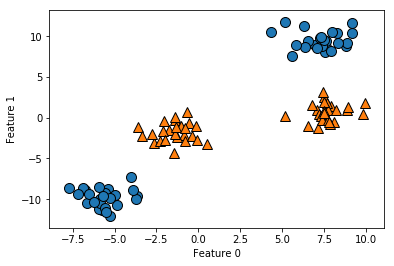

In [39]:
from sklearn.model_selection import train_test_split

# linearly non-separable task
X, y = sk.datasets.make_blobs(centers=4, random_state=8)
y = y % 2

# visualize data
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

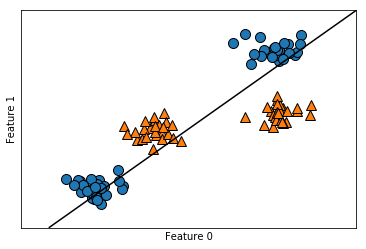

In [40]:
# linear SVC does not work well for linearly non-separable data

from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5, 0, 'feature1 ** 2')

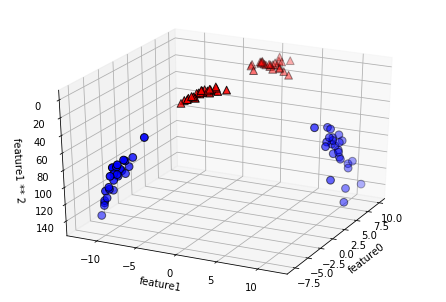

In [41]:
# transform to high-dimensional space by adding the squared second feature

X_new = np.hstack([X, X[:, 1:] ** 2])

# visualization
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

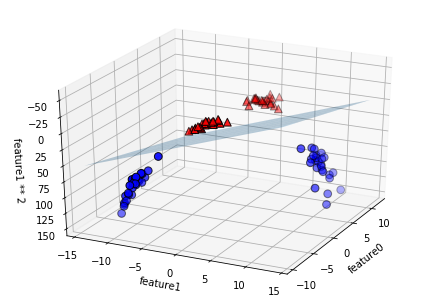

In [0]:
# Now, linear SVC works

linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

## SVM with RBF kernel

$K_{RBF}(X_i,X_j)=exp(-\gamma |X_i-X_j|^2)$

Text(0, 0.5, 'Feature 1')

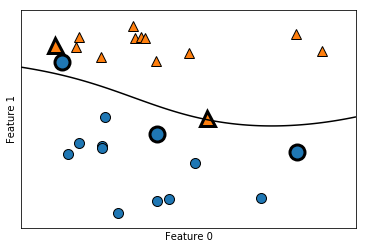

In [0]:
# kernel trick
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# plot support vectors
sv = svm.support_vectors_

# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

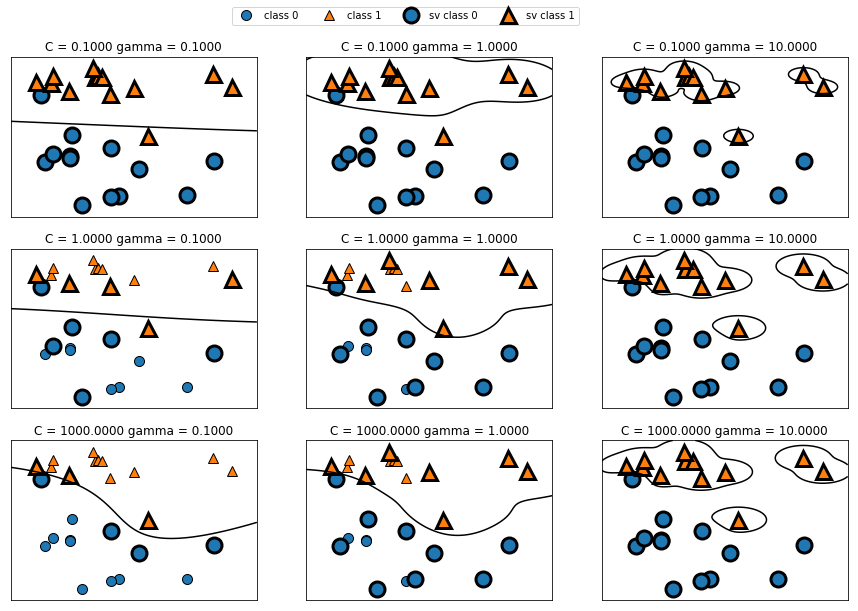

In [0]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
  for a, gamma in zip(ax, range(-1, 2)):
    mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
    
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2))

In [0]:
# SVC is sensitive to hyper-parameters
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
#X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Preprocessing data for SVM (Min-Max normalization)

In [0]:
# min-max normaization

# compute the min and max value per feature on the training set
min_on_training = X_train.min(axis=0)
max_on_training = X_train.max(axis=0)

# subtract the min, and divide by range
X_train_scaled = (X_train - min_on_training) / (max_on_training - min_on_training)

# afterward, min=0 and max=1 for each feature
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [0]:
# use THE SAME transformation on the test set,
# using min and range of the training set (see Chapter 3 for details)
X_test_scaled = (X_test - min_on_training) / (max_on_training - min_on_training)

In [0]:
# Then, SVC provides much better performance

svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Automatically created module for IPython interactive environment


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


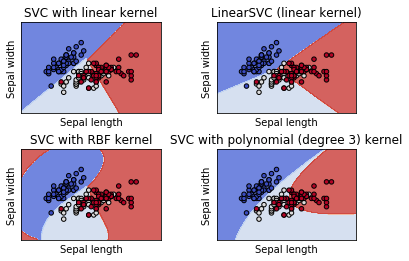

In [0]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Neural Networks with sci-kit learn

* Mathmetical model to immitate biological neurons

* Powerful, flexible, scalable (Reemerging with deep learning)

* Mapping between vectors or sequences.
> classification, regression, transform tasks, detection, segmentation
  
* Learns probabilistic densities
> generation, transform, annomaly detection


* $y_j=f(\sum_i{w_{ij} x_i}+b_j)$

> $f(\cdot)$: nonlinear activation function (ReLU, sigmoid, tanh, etc.)

* training algorithm: backpropagation



see: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


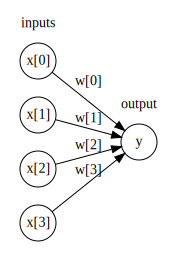

In [0]:
# Single-layer perceptron (similar to logistic regression)

# works for only linearly separable tasks

display(mglearn.plots.plot_logistic_regression_graph())

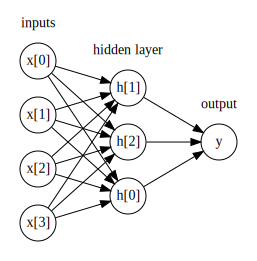

In [0]:
# Multi-layer perceptron

# Applicable to non-separable tasks  (universal approximator theorem)

display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'sigmoid(x), relu(x), tanh(x)')

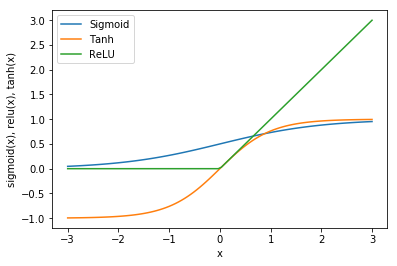

In [0]:
# non-linearity functions (sigmoid, tanh, ReLU)

line = np.linspace(-3, 3, 100)

plt.plot(line, [1/(1+np.exp(-x)) for x in line], label="Sigmoid")
plt.plot(line, np.tanh(line), label="Tanh")
plt.plot(line, np.maximum(line, 0), label="ReLU")

plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("sigmoid(x), relu(x), tanh(x)")

# Classification with MLP

In [0]:
# generate data

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)

Text(0, 0.5, 'Feature 1')

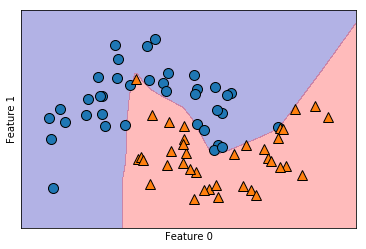

In [0]:
# using 100 hidden units  (default)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)   # LBFGS (memory limited BFGS): a quasi Newton optimizing algorithm

# visualize MLP
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

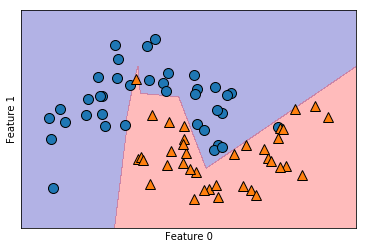

In [0]:
# using 10 hidden units

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

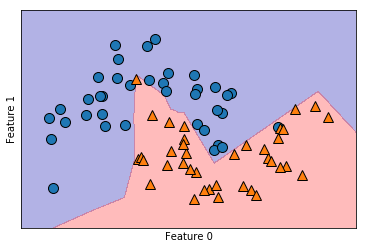

In [0]:
# using two hidden layers, with 10 units each

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

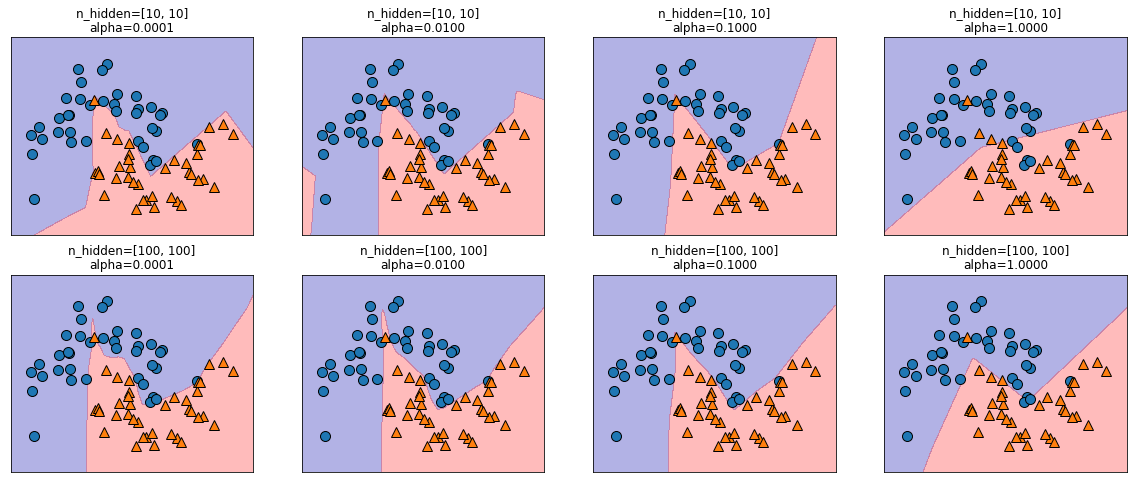

In [0]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
  for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
    mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


## Preprocessing data for MLP (standaridzation)

In [0]:
# Normalizing data for MLP

# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)


# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train


In [0]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Regression with MLP

See https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html


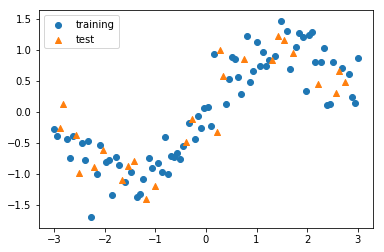

In [0]:
# load data
#X, y = mglearn.datasets.make_wave()

# generate data along sine wave


# generate data
X = np.linspace(-3, 3, 100)
y = np.sin(X) + np.random.normal(loc=0, scale=0.3,size=len(X))
X = np.expand_dims(X, axis=-1)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# plot data
plt.scatter(X_train, y_train, marker='o', label="training")
plt.scatter(X_test, y_test, marker='^', label="test")
plt.legend()

Training set score: 0.84
Test set score: 0.85


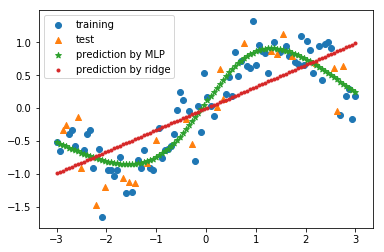

In [0]:
from sklearn.neural_network import MLPRegressor
mlpR = MLPRegressor(activation = 'tanh', hidden_layer_sizes = (100, 100), max_iter=10000).fit(X_train, y_train)


# ridge regression for comparison
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)

print("Training set score: {:.2f}".format(mlpR.score(X_train, y_train)))
print("Test set score: {:.2f}".format(mlpR.score(X_test, y_test)))

import matplotlib.pyplot as plt

# plot data
plt.scatter(X_train, y_train, marker='o', label="training")
plt.scatter(X_test, y_test, marker='^', label="test")

# plot prediction by MLP regressor
line = np.linspace(-3, 3, 100)
line = np.expand_dims(line, axis=-1)        # mlpR input should be an array of rank 2
line_MLP = mlpR.predict(line)
plt.scatter(line, line_MLP, marker='*', label="prediction by MLP")


# for comparison, plot prediction by Ridge regressor
line_ridge = ridge.predict(line)
plt.scatter(line, line_ridge, marker='.', label="prediction by ridge")

plt.legend()